In [1]:
# Implementación de Paquetes

#Paquete de aleatoriedad
import random

# Paquete para procesamiento matematico y matricial
import numpy as np
import pandas as pd

#Paquetes para Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

# Paquetes de Machine Learning
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
#Definición de Funciones que aplicaremos más adelante.

#Genera una Matriz de confusión.
def plot_cm(y_true, y_pred, figsize=(8,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0.0%'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Valores Verdaderos'
    cm.columns.name = 'Prediccion'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
#Genera la precisión del modelo.
def val_accuracy(d_test, y_predict):
    
    accuracy = []
    true_value = d_test#d_test # valores verdaderos
    predictions = y_predict#y_predict # predicciones hechas por el modelo
    cont_true_val = 0

    # conteo de los valores que se predicieron correctamente
    for i in range(len(true_value)):
        if true_value[i] == predictions[i]:
            cont_true_val = cont_true_val + 1

    # calculamos el porcentaje
    result = cont_true_val / float(len(true_value)) * 100.0

    accuracy.append(result)

    #Accuracy
    print('Accuracy: %.3f%%' % (sum(accuracy)/float(len(accuracy))))

## Solución cerrada regresión lineal.

* Utilizando numpy (np.random), genere 100 datos que se encuentren entre 0 y 3. Este vector representará su variable independiente. 

In [3]:
np.random.seed(33)
X = 3*np.random.rand(100,1)

* Con la misma librería, genere los 100 datos de la variable dependiente de la siguiente forma y = 5 +2x + u(-2,5).

In [4]:
u = np.random.uniform(-2,5,100)
u = u.reshape(-1, 1)

# Función modelo.
y = 5 + 2*X + u

* Por medio de matplotlib (o seaborn), genere un gráfico de dispersión (scatterplot) entre la variable dependiente y la variable independiente.

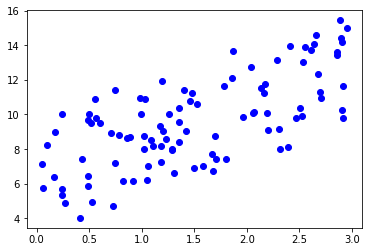

In [5]:
plt.scatter(X, y, c ="blue")
plt.show()

* Estudie y aplique los métodos disponibles en numpy.linalg para ajustar una
regresión lineal a través de su solución cerrada. ¿Cuál es el error cuadrático
medio de la solución?

In [6]:
X_ = np.c_[np.ones((100,1)), X] 
theta_opt = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y) 
theta_opt 

array([[6.43998852],
       [2.09897245]])

In [7]:
X_nuevo = np.array([[0], [6]])
X_nuevo_ = np.c_[np.ones((2,1)), X_nuevo]
y_pred = X_nuevo_.dot(theta_opt)
print('pred', y_pred)

pred [[ 6.43998852]
 [19.03382325]]


* Error medio Cuadrado (La verdad no se si esta bueno, fue lo unico que se me ocurrio)

In [8]:
mse = (np.square(theta_opt - y_pred)).mean()
mse

143.3945856766525

In [9]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(theta_opt ,y_pred)
mse2

143.3945856766525

In [10]:
mse3 = np.mean((theta_opt  - y_pred)**2)
mse3

143.3945856766525

* Utilizando matplotlib (o seaborn), genere un gráfico que incluya la solución (recta óptima) y los datos utilizados. 

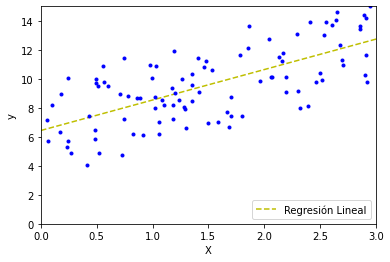

In [11]:
plt.plot(X_nuevo, y_pred, 'y--')
plt.plot(X,y, "b.")
plt.ylabel('y')
plt.xlabel('X')
plt.axis([0, 3, 0, 15])
plt.legend(["Regresión Lineal"],loc="lower right")
plt.show()

## Regresión Polinomial.


* De ahora en adelante, trabajaremos con una base de datos real, esta
corresponde a una curva de luz (intensidad de luz de una estrella en
funcióndel tiempo). En primer lugar, lea el archivo ts.csv utilizando pandas.
Trabaje con una muestra de 200 datos.

In [12]:
dataset_ts = pd.read_csv('/Users/darwi/Downloads/ts.csv')
sample_df_ts = dataset_ts.sample(200)
sample_df_ts.info

<bound method DataFrame.info of         tiempo  magnitud
683  -0.171046 -0.297176
909   0.624764  0.338661
35   -1.375679 -4.150969
843   0.396353 -0.002520
172  -1.057233  0.230103
...        ...       ...
352  -0.754444  0.230103
408  -0.582531 -0.328193
972   0.844571  1.001637
289  -0.879426  0.664333
1102  1.480366 -0.316562

[200 rows x 2 columns]>

* Mediante matplotlib o seaborn, visualizar la curva de luz con un scatter plot.

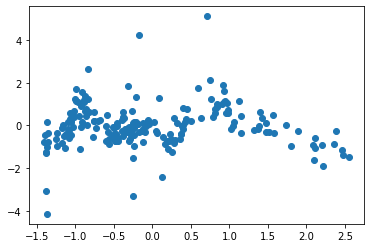

In [13]:
x = sample_df_ts["tiempo"]
y = sample_df_ts["magnitud"]
plt.scatter(x, y)

* Genere una transformación polinomial de la variable independiente. Para
esta transformación puede crear su propia función o puede utilizar el método
disponible por Scikit-Learn.

In [14]:
polinomio = PolynomialFeatures(degree = 18) 
model = LinearRegression() 

x = sample_df_ts['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

* Ajuste regresiones polinomiales de diferentes grados. 

In [15]:
polinomio = PolynomialFeatures(degree = 18) 
model = LinearRegression() 

model.fit(data_poly, sample_df_ts['magnitud']) 

x_lin = np.linspace(min(sample_df_ts['tiempo']),max(sample_df_ts['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

* Grafique los modelos resultantes, ¿qué observa a medida que aumenta el grado del polinomio?
**R.-* El modelo se va ajustando cada vez que eleva el polinomio, pero hay que tener cuidado de provocar sobre ajuste y según mi trabajo y mi criterio lo dejaria en un polinomio de grado 18 (creo que es el que mejor se ajusta).

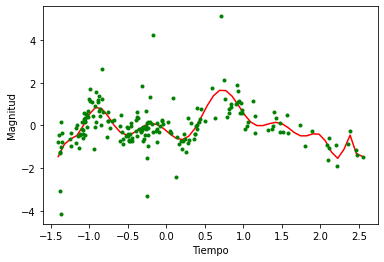

In [16]:
plt.plot(x_lin,y_pred, color='red')
plt.plot(sample_df_ts['tiempo'], sample_df_ts['magnitud'],'.', color='green')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

## Regresión con penalización.

* Utilizando la misma curva de luz ts.csv y polinomios de diferentes grados, experimente con regresión Ridge y Lasso.

In [17]:
data = pd.DataFrame(np.column_stack([sample_df_ts['tiempo'],sample_df_ts['magnitud']]),columns=['x','y'])
data

,x,y
0,-0.171046,-0.297176
1,0.624764,0.338661
2,-1.375679,-4.150969
3,0.396353,-0.002520
4,-1.057233,0.230103
...,...,...
195,-0.754444,0.230103
196,-0.582531,-0.328193
197,0.844571,1.001637
198,-0.879426,0.664333


* Obtenga los valores de los parámetros ¿Qué puede comentar al respecto? ¿Qué ocurre al aumentar el valor de alfa (penalización) en cada modelo?

 **R.-**  A medida que aumenta el valor de alpha, la regularización es mayor y más predictores quedan excluidos (su coeficiente es 0 y cada vez que va aumentando se excluyen predictores).

In [18]:
for i in range(2,16):  #el poder de 1 ya está ahí
    colname = 'x_%d'%i      #la nueva var será x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0 -0.171046 -0.297176  0.029257 -0.005004  0.000856 -0.000146  0.000025   
1  0.624764  0.338661  0.390329  0.243864  0.152357  0.095187  0.059469   
2 -1.375679 -4.150969  1.892492 -2.603461  3.581526 -4.927029  6.778008   
3  0.396353 -0.002520  0.157096  0.062265  0.024679  0.009782  0.003877   
4 -1.057233  0.230103  1.117741 -1.181713  1.249345 -1.320849  1.396445   

        x_7           x_8           x_9          x_10          x_11  \
0 -0.000004  7.326622e-07 -1.253189e-07  2.143531e-08 -3.666424e-09   
1  0.037154  2.321268e-02  1.450244e-02  9.060593e-03  5.660728e-03   
2 -9.324362  1.282733e+01 -1.764628e+01  2.427561e+01 -3.339544e+01   
3  0.001537  6.090591e-04  2.414026e-04  9.568069e-05  3.792335e-05   
4 -1.476367  1.560864e+00 -1.650197e+00  1.744642e+00 -1.844493e+00   

           x_12          x_13          x_14          x_15  
0  6.271272e-10 -1.072676e-10  1.834770e-11 -3.138301e-12  
1 

In [19]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    #inicializar predictores:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Ajustar el modelo
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Verifique si se va a hacer un gráfico para la potencia ingresada
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred,'.', color='red')
        plt.plot(data['x'],data['y'],'.', color='black')
        plt.title('Grado: %d'%power)
    
    #Devuelve el resultado en formato predefinido
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

* Implementa modelos para distinto grado de polinomio utilizando regresión Lasso.

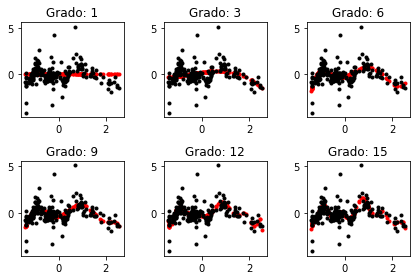

In [20]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Definir las potencias para las que se requiere una trama:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterar a través de todos los poderes y asimilar los resultados.
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [21]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Verifique si se va a hacer un gráfico para el alfa ingresado
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred,'.', color='red')
        plt.plot(data['x'],data['y'],'.', color='black')
        plt.title('Alpha: %.3g'%alpha)
    
    #Devuelve el resultado en formato predefinido
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

* Grafique los modelos resultantes. 

c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.286893241261, tolerance: 0.019977457412761936
  model = cd_fast.enet_coordinate_descent(
c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.28671667995373, tolerance: 0.019977457412761936
  model = cd_fast.enet_coordinate_descent(
c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.26924104435764, tolerance: 0.019977457412761936
  model = cd_fast.enet_coordinate_descent(
c:\users\darwi\

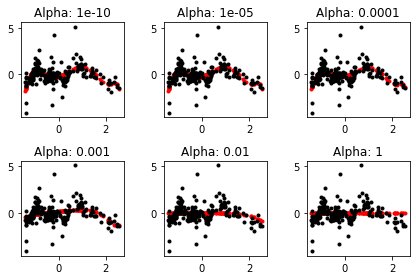

In [22]:
#Inicializar predictores a las 15 potencias de x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Definir los valores alfa para probar
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Inicializar el marco de datos para almacenar coeficientes
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Definir los modelos a trazar
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Itera sobre los 10 valores alfa:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [23]:
from sklearn.linear_model import Lasso
modelo = Lasso(alpha=0.01,normalize=True)
modelo.fit(data,y)
y_pred = modelo.predict(data)

In [24]:
y_pred

array([-2.57621636e-01,  2.88243691e-01, -3.56609807e+00, -4.65965520e-03,
        1.95047172e-01, -1.05644894e+00,  3.68126422e-01, -3.47489708e-01,
        1.10038479e+00, -1.08640497e+00, -6.33736161e-01, -1.31606782e+00,
        5.31220331e-01, -3.67460391e-01,  1.99723903e-03,  4.67979836e-01,
       -1.77738905e-01,  6.77672004e-01,  4.39554744e+00,  3.63333305e+00,
        1.05045808e+00, -2.17680271e-01, -1.25615577e+00, -2.37650953e-01,
       -6.70349079e-01, -6.17093925e-01, -1.10637565e+00, -1.14498410e-01,
        1.36998900e+00,  1.84262850e+00,  1.48448912e-01, -1.24483751e-01,
        2.44973879e-01, -2.11023377e-01, -7.26932680e-01, -9.11992803e-02,
       -4.37357781e-01,  4.21381576e-01, -5.33882747e-01,  4.97935860e-01,
       -1.04513069e-01, -3.80774180e-01,  6.44387533e-01,  5.52523929e-02,
       -9.63252425e-01,  1.01384516e+00,  5.87803932e-01,  2.81586797e-01,
        1.15363994e+00,  8.18799699e-02, -1.11169963e-01, -6.30407713e-01,
        1.68419595e-01,  

## Clasificación de estrellas variables.

* Cargue la base de datos de estrellas variables ts2.csv. La columna Class corresponde a la clase de cada estrella variable y el resto de las columnas corresponden sus descriptores

In [25]:
#Carga del dataset.
dataset_ts2 = pd.read_csv('/Users/darwi/Downloads/ts2.csv')
dataset_ts2

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,lpv,0.04000,0.112777,2,0.340000,0.0040,-0.000014,1.689189,13.335943,0.001613,0.0155,0.420000,0.004724,17.743225
4996,lpv,0.21250,0.000000,50,0.463333,-0.0655,-0.000224,11.590296,14.113617,0.009283,0.1250,0.303333,0.018120,1375.234215
4997,lpv,0.02175,0.030271,4,0.333333,0.0100,-0.000031,0.014262,14.477476,0.000819,0.0090,0.295238,0.002141,1111.578564
4998,lpv,0.02650,0.446972,2,0.313333,0.0030,0.000013,0.140885,13.661500,0.000972,0.0090,0.430000,0.003221,2866.316360


* Genere un análisis descriptivo de ella y aplique las técnicas de procesamiento que sean necesarias. 

In [26]:
#Inspección de tipos de variables.
dataset_ts2.dtypes

Class                object
Amplitude           float64
AndersonDarling     float64
Autocor_length        int64
Beyond1Std          float64
Gskew               float64
LinearTrend         float64
MaxSlope            float64
Mean                float64
Meanvariance        float64
MedianAbsDev        float64
MedianBRP           float64
PercentAmplitude    float64
PeriodLS            float64
dtype: object

In [27]:
# Transformacion del campo "Class" a categorico.
dataset_ts2['Class'] = dataset_ts2['Class'].astype('category')

In [28]:
# Conteo de Datos Faltantes.
for row in dataset_ts2.columns:
    print(row, dataset_ts2[row].isnull().sum())

Class 0
Amplitude 0
AndersonDarling 0
Autocor_length 0
Beyond1Std 0
Gskew 0
LinearTrend 0
MaxSlope 0
Mean 0
Meanvariance 0
MedianAbsDev 0
MedianBRP 0
PercentAmplitude 0
PeriodLS 0


**R.-**  No se encontro datos faltantes en el dataset.

c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


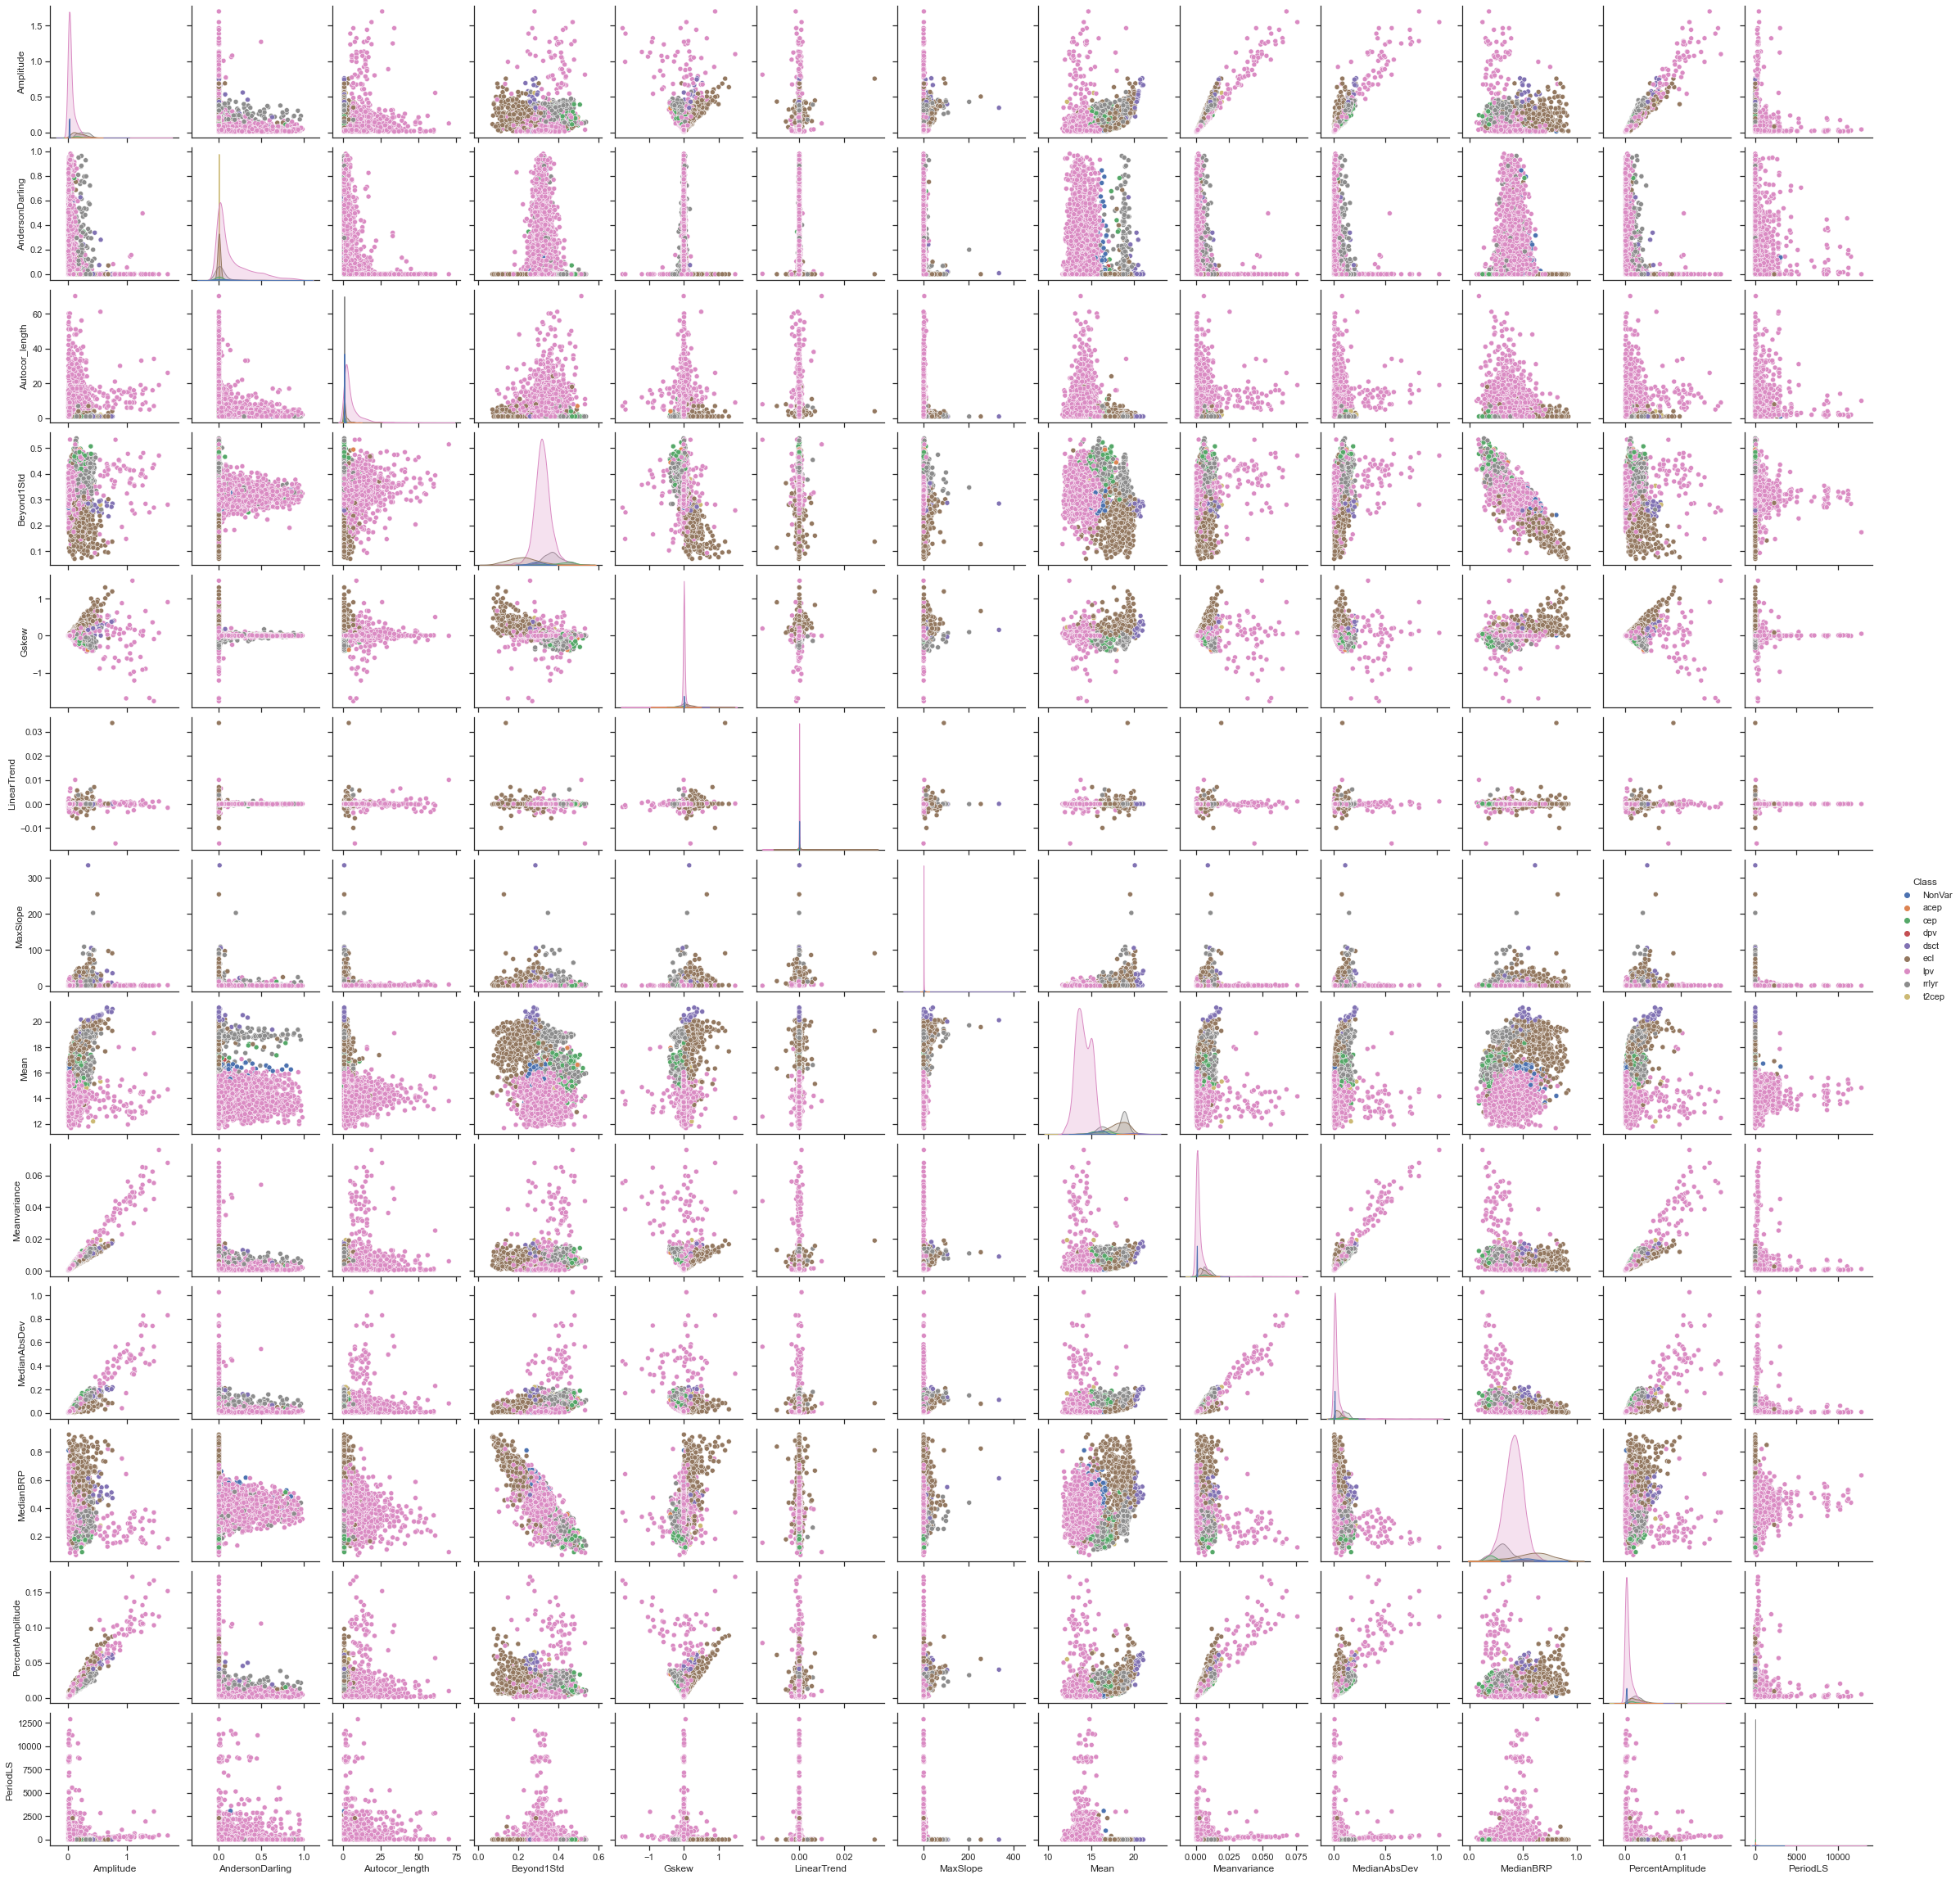

In [29]:
#Vizualisación Multivariable del Dataset.
sns.set_theme(style="ticks")
sns.pairplot(dataset_ts2, hue = 'Class')

**R.-** Se puede apreciar la multivariabilidad de las Clases y la cual señala que la clase lpv, seguida de ocl son las mas predominantes en cuanto a la información que se poseeen de ellas.

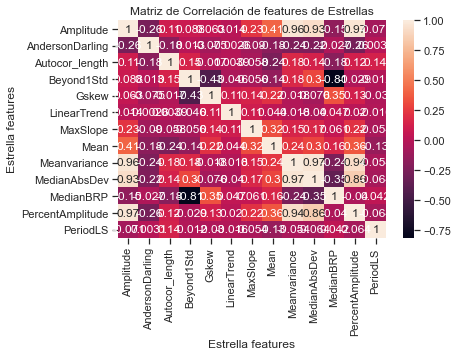

In [30]:
#Matriz de correlación, para determinar correlaciones entre variables.
correlation_mat = dataset_ts2.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title("Matriz de Correlación de features de Estrellas")
plt.xlabel("Estrella features")
plt.ylabel("Estrella features")

plt.show()

In [31]:
#Ordenación de la matriz de correlación (la matriz de correlación puede llegar a ser muy grande 
#y por lo tanto difícil de interpretar).
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

MedianBRP         Beyond1Std         -0.812204
Beyond1Std        MedianBRP          -0.812204
                  Gskew              -0.431837
Gskew             Beyond1Std         -0.431837
MedianBRP         MedianAbsDev       -0.347504
                                        ...   
Beyond1Std        Beyond1Std          1.000000
Autocor_length    Autocor_length      1.000000
AndersonDarling   AndersonDarling     1.000000
PercentAmplitude  PercentAmplitude    1.000000
PeriodLS          PeriodLS            1.000000
Length: 169, dtype: float64


In [32]:
#Seleccionar pares de correlación negativos.
negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

MedianBRP        Beyond1Std        -0.812204
Beyond1Std       MedianBRP         -0.812204
                 Gskew             -0.431837
Gskew            Beyond1Std        -0.431837
MedianBRP        MedianAbsDev      -0.347504
                                      ...   
PeriodLS         LinearTrend       -0.015647
                 Beyond1Std        -0.012389
Beyond1Std       PeriodLS          -0.012389
LinearTrend      AndersonDarling   -0.002598
AndersonDarling  LinearTrend       -0.002598
Length: 74, dtype: float64


In [33]:
#Seleccionar pares de correlación fuerte (magnitudes mayores a 0.5).
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

MedianBRP         Beyond1Std         -0.812204
Beyond1Std        MedianBRP          -0.812204
PercentAmplitude  MedianAbsDev        0.858010
MedianAbsDev      PercentAmplitude    0.858010
                  Amplitude           0.931116
Amplitude         MedianAbsDev        0.931116
Meanvariance      PercentAmplitude    0.936283
PercentAmplitude  Meanvariance        0.936283
Meanvariance      Amplitude           0.964659
Amplitude         Meanvariance        0.964659
MedianAbsDev      Meanvariance        0.965931
Meanvariance      MedianAbsDev        0.965931
PercentAmplitude  Amplitude           0.966669
Amplitude         PercentAmplitude    0.966669
                  Amplitude           1.000000
MaxSlope          MaxSlope            1.000000
MedianBRP         MedianBRP           1.000000
MedianAbsDev      MedianAbsDev        1.000000
Meanvariance      Meanvariance        1.000000
Mean              Mean                1.000000
LinearTrend       LinearTrend         1.000000
Gskew        

**R.-** En conclusión a través de la matriz de correlación (correlación no significa causalidad) podemos determinar que las siguientes variables posseen Correlacción Fuertemente positiva:

* MedianAbsDev   -   PercentAmplitude:    0.858010
* MedianAbsDev   -   Amplitude:           0.931116
* PercentAmplitude - Meanvariance:        0.936283
* Meanvariance   -   Amplitude:           0.964659
* MedianAbsDev  -    Meanvariance:        0.965931
* PercentAmplitude - Amplitude:           0.966669

Correlación  Fuertemente Negativa:

* PeriodLS    -     LinearTrend:       -0.015647
* PeriodLS    -     Beyond1Std:        -0.012389
* LinearTrend   -   AndersonDarling:   -0.002598

* Separe la base de datos en dos conjuntos, uno para entrenar y otro para testear.

In [34]:
#Variables Independientes.
X = dataset_ts2.loc[:,['Amplitude','AndersonDarling','Autocor_length','Beyond1Std',
                       'Gskew','LinearTrend','MaxSlope','Mean','Meanvariance','MedianAbsDev','MedianBRP']].values
#Variables Dependientes.
y = dataset_ts2.loc[:,'Class'].values

In [35]:
y.unique()

['lpv', 'ecl', 'rrlyr', 'cep', 'NonVar', 'dsct', 't2cep', 'dpv', 'acep']
Categories (9, object): ['lpv', 'ecl', 'rrlyr', 'cep', ..., 'dsct', 't2cep', 'dpv', 'acep']

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_LabelEncode = le.fit_transform(y)

In [37]:
le.classes_

array(['NonVar', 'acep', 'cep', 'dpv', 'dsct', 'ecl', 'lpv', 'rrlyr',
       't2cep'], dtype=object)

In [38]:
pd.DataFrame({
    "Original": y[:10],
    "Codificada": y_LabelEncode[:10]
})

,Original,Codificada
0,lpv,6
1,lpv,6
2,ecl,5
3,lpv,6
4,lpv,6
5,ecl,5
6,lpv,6
7,rrlyr,7
8,lpv,6
9,lpv,6


In [39]:
#Dividir el DataSet en conjuntos de entrenamiento y conjunto de testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_LabelEncode, test_size = 0.20, random_state = 0)

* Aplique 2 clasificadores de los vistos en el curso. Por cada uno de ellos,
estudie el efecto que tienen los hiperparámetros sobre la predicción en el
conjunto de entrenamiento y de testeo. Comente el efecto de cada
parámetro.

### Random Forest.

In [40]:
#Escalado de variables.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_RF = sc.fit_transform(X_train)
X_test_RF = sc.transform(X_test)

#Entrenando al modelo Random Forest Classification en el set de entrenamiento.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 2500, criterion = 'gini', random_state = 0)
classifier.fit(X_train_RF, y_train)

#Predicción de los resultados del conjunto de pruebas.
y_pred_RF = classifier.predict(X_test_RF)

#Haciendo la Matriz de Confusión.
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)

[[  9   0   0   0   0   3   0   0]
 [  0   0   1   0   0   0   1   0]
 [  0   0  16   0   2   0   9   0]
 [  0   0   0   2   1   0   3   0]
 [  0   0   0   0  77   6   1   0]
 [  1   0   0   0   1 761   0   0]
 [  0   0   2   0   7   2  93   0]
 [  0   0   0   0   1   1   0   0]]


**R.-** Con un n_estimators = 10 árboles se genera una Accuracy: 95.500%, se subio a n_estimators = 5000 árboles para acotar la búsqueda y generar un rango de búsqueda el cual dio una Accuracy: 95.700%, luego se acoto a n_estimators = 2500 árboles que dio un Accuracy: 95.800%, se volvio a acotar por ultima vez a n_estimators = 1250 árboles que dio un Accuracy: 95.600%, por lo cúal el mejor hiper parametro es un n_estimators = 2500.

Para el criterion se preferio elejir 'gini' en ves de 'entropy', 'entropy' me generaba un Accuracy un poco más bajas que las que me entrega 'gini', debe haber una diferencia entre lo que entrega la impureza de Gini y la "entropía" para la ganancia de la información.

### Naive Bayes.

In [41]:
# Escalado de variables.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_NB = sc.fit_transform(X_train)
X_test_NB = sc.transform(X_test)

# Entrenando al modelo Naive Bayes en el set de entrenamiento.
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(var_smoothing = 1e-3)
classifier.fit(X_train_NB, y_train)

# Predicción de los resultados del conjunto de pruebas.
y_pred_NB = classifier.predict(X_test_NB)

# Haciendo la Matriz de Confusión.
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
print(cm_NB)

[[ 12   0   0   0   0   0   0   0]
 [  0   0   1   0   1   0   0   0]
 [  0   0  17   0   0   1   5   4]
 [  0   0   0   4   0   0   2   0]
 [  2   0   0   7  60   8   2   5]
 [ 80   0   0   0  10 666   0   7]
 [  0   0  18   3   2   4  69   8]
 [  0   0   0   0   0   0   0   2]]


**R.-** var_smoothing: (predeterminado 1e-9) Con respecto al suavizado de varianza, el valor flotante proporcionado se utiliza para calcular las mayores varianzas de cada característica y agregarlo a la varianza del cálculo de estabilidad y poder tener un mejor tunneo de los hyperparametros.

* var_smoothing = 1e-100 -> Accuracy: 71.400%
* var_smoothing = 1e-9 -> Accuracy: 78.300%.
* var_smoothing = 1e-5 -> Accuracy: 81.200%.
* var_smoothing = 1e-3 -> Accuracy: 83.000%.
* var_smoothing = 1e-1 -> Accuracy: 69.800%.

Por lo cual la mejor opción para var_smoothing es de 1e-3 el cual me da la mejor Accuracy: 83.00%.

priors: con respecto a las probabilidades de clases previas, cuando se proporcionan las anteriores (en una matriz), no se ajustarán en función del conjunto de datos. Se encontro este hyperparametros pero no se aplico, segun leido por la literatura
de skelearn sirve para utilizar las probabilidades previas de las clases y si se especifica, los antecedentes no se ajustan de acuerdo con los datos.

### KNearest Neighbours

* Estudie el clasificar KNN y use su implementación disponible en Scikit-Learn.
* Determine el número k (n_neighbors) adecuado para este conjunto de datos. 

In [42]:
# Escalado de variables.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_KNN = sc_X.fit_transform(X_train)
X_test_KNN = sc_X.transform(X_test)

# Ajustar el clasificador en el Conjunto de Entrenamiento.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 77,
                                  metric = "minkowski",
                                  p = 1)
#Entrenamiento del modelobrute.
classifier.fit(X_train_KNN, y_train)

# Predicción de los Resultados con el Conjunto de Testing.
y_pred_KNN = classifier.predict(X_test)

# Elaborar una matriz de Confusión.
from sklearn.metrics import confusion_matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)

[[  0   0   0   0   9   1   2   0]
 [  0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   3  24   0]
 [  0   0   0   0   3   0   3   0]
 [  0   0   0   0  59  17   8   0]
 [  0   0   0   0  22 736   5   0]
 [  0   0   0   0  15   3  86   0]
 [  0   0   0   0   0   0   2   0]]


**R.-** El hyperparametro metric, funciona mejor con "minkowski" que con "euclidean" ya que la distancia euclediana es más simple que minkowski y a la vez p hay que asignarle un valor de p = 1 ya que va de la mano con la metric que se asigne.

En relación a los n_neighbors se designo como la toma de **77** vecinos como un corte adecuado ya que menos vecinos como más vecinos no mejoraban el modelo.

* Compare el rendimiento de los clasificadores, utilizando matrices de
confusión y métricas vistas en el curso.

+ **Precision** nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
+ **Recall** nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
+ **F1** combina Precision y Recall en una sola medida.

#### Random Forest.

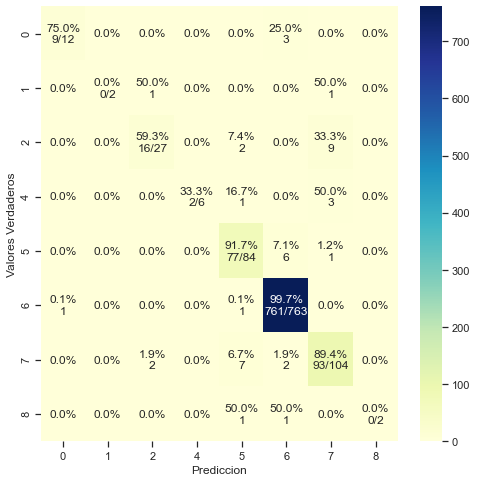

In [43]:
# Aplicación de función de Matriz de Confusión para graficarla.
plot_cm(y_test, y_pred_RF)

In [44]:
val_accuracy(y_test, y_pred_RF)

Accuracy: 95.800%


In [45]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

rcRF = recall_score(y_test, y_pred_RF, average='weighted')
acRF = accuracy_score(y_test, y_pred_RF)
f1RF = f1_score(y_test, y_pred_RF, average='weighted')
psRF = precision_score(y_test, y_pred_RF, average='weighted')

c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
print("Métricas de Random Forest.")
print("Recall (Exhaustividad):",round(rcRF*100,3),"%.")
print("Accuracy (Exactitud):",round(acRF*100,3),"%.")
print("Precision (Precisión):",round(psRF*100,3),"%.")
print("F1:",round(f1RF*100,3),"%.")

Métricas de Random Forest.
Recall (Exhaustividad): 95.8 %.
Accuracy (Exactitud): 95.8 %.
Precision (Precisión): 95.376 %.
F1: 95.41 %.


#### Naive Bayes.

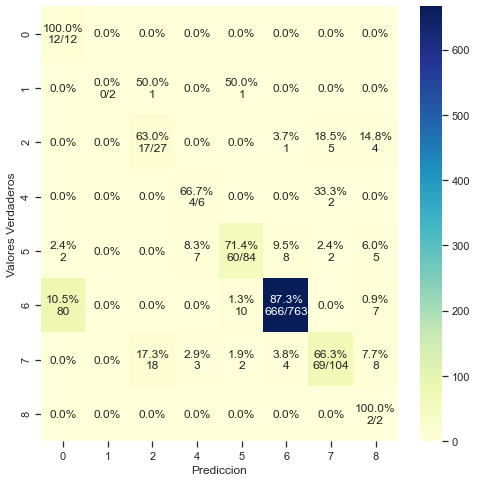

In [47]:
# Aplicación de función de Matriz de Confusión para graficarla.
plot_cm(y_test, y_pred_NB)

In [48]:
# Aplicación de función de Precisión.
val_accuracy(y_test, y_pred_NB)

Accuracy: 83.000%


In [49]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

rcNB = recall_score(y_test, y_pred_NB, average='weighted')
acNB = accuracy_score(y_test, y_pred_NB)
f1NB = f1_score(y_test, y_pred_NB, average='weighted')
psNB = precision_score(y_test, y_pred_NB, average='weighted')

c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
print("Métricas de Naive Bayes.")
print("Recall (Exhaustividad):",round(rcNB*100,3),"%.")
print("Accuracy (Exactitud):",round(acNB*100,3),"%.")
print("Precision (Precisión):",round(psNB*100,3),"%.")
print("F1:",round(f1NB*100,3),"%.")

Métricas de Naive Bayes.
Recall (Exhaustividad): 83.0 %.
Accuracy (Exactitud): 83.0 %.
Precision (Precisión): 92.558 %.
F1: 86.783 %.


#### KNearest Neighbours

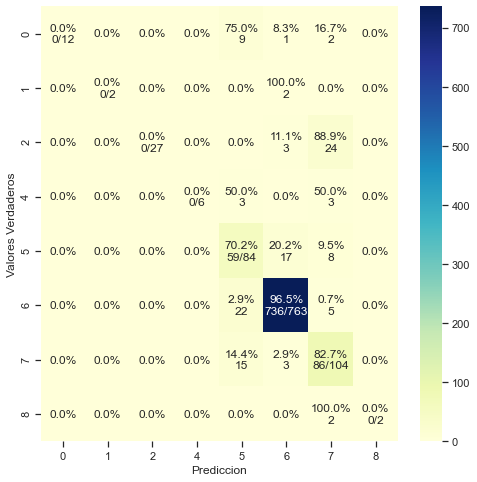

In [51]:
# Aplicación de función de Matriz de Confusión para graficarla.
plot_cm(y_test, y_pred_KNN)

In [52]:
# Aplicación de función de Precisión.
val_accuracy(y_test, y_pred_KNN)

Accuracy: 88.100%


In [53]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

rcKNN = recall_score(y_test, y_pred_KNN, average='weighted')
acKNN = accuracy_score(y_test, y_pred_KNN)
f1KNN = f1_score(y_test, y_pred_KNN, average='weighted')
psKNN = precision_score(y_test, y_pred_KNN, average='weighted')

c:\users\darwi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print("Métricas de KNearest Neighbours.")
print("Recall (Exhaustividad):",round(rcKNN*100,3),"%.")
print("Accuracy (Exactitud):",round(acKNN*100,3),"%.")
print("Precision (Precisión):",round(psKNN*100,3),"%.")
print("F1:",round(f1KNN*100,3),"%.")

Métricas de KNearest Neighbours.
Recall (Exhaustividad): 88.1 %.
Accuracy (Exactitud): 88.1 %.
Precision (Precisión): 85.165 %.
F1: 86.455 %.


En la selección del modelo el mejor modelo seria el Random Forest, luego el KNearest Neighbours y por último Naive Bayes.
####  Random Forest > KNearest Neighbours > Naive Bayes 